In [1]:
import networkx as nx
import seaborn as sns

import numpy as np

%pylab inline

import powerlaw as pwl

Populating the interactive namespace from numpy and matplotlib


In [2]:
G = nx.read_gml('../log/graph.gml')

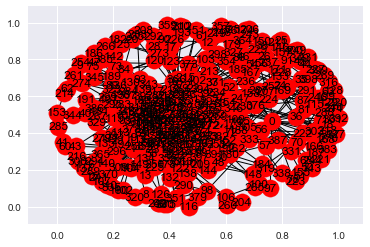

In [62]:
nx.draw_networkx(G)

In [3]:
degree = list(nx.degree(G).values())
degree = [x + 1 for x in degree]

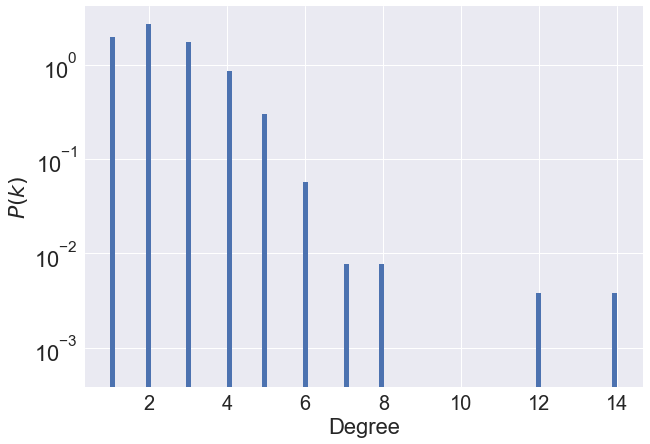

In [4]:
figure(figsize=(10,7))
hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

xticks(fontsize=20)
yticks(fontsize=22)
xlabel('Degree', fontsize=22)
ylabel('$P(k)$', fontsize=22)


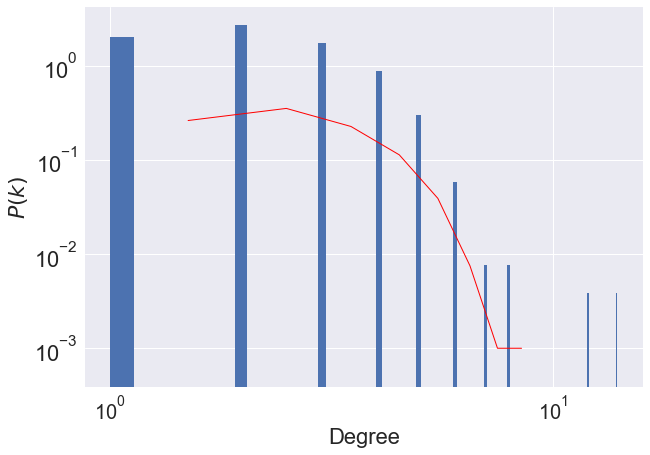

In [5]:
figure(figsize=(10,7))
hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

pwl.plot_pdf(degree, color='r', linear_bins=True, linewidth=1)

xticks(fontsize=20)
yticks(fontsize=22)
xlabel('Degree', fontsize=22)
ylabel('$P(k)$', fontsize=22)

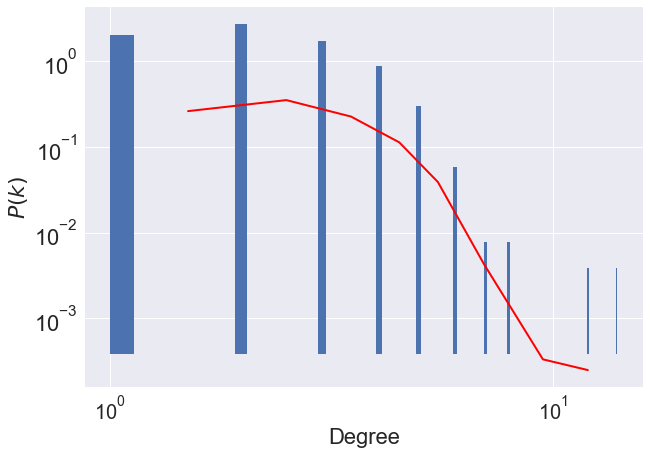

In [6]:
plt.figure(figsize=(10,7))
plt.hist(degree, bins=100, normed=True, log=True, histtype='stepfilled')

pwl.plot_pdf(degree, color='r', linear_bins=False, linewidth=2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [7]:
fit_function = pwl.Fit(degree, verbose=False)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [8]:
fit_function

In [9]:
fit_function.power_law

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [10]:
fit_function.power_law.alpha

9.6629712654557292

In [11]:
fit_function.power_law.sigma

1.8904153127227743

In [12]:
fit_function.power_law.xmin

6.0

In [13]:
fit_function_fixmin = pwl.Fit(degree, xmin=10)

In [14]:
fit_function_fixmin.xmin

10.0

In [15]:
fit_function_fixmin.power_law.alpha

4.8550962355085261

In [16]:
fit_function_fixmin.power_law.sigma

2.7259646902548105

In [17]:
fit_function.power_law.D

0.10774689710786767

In [18]:
fit_function_fixmin.power_law.D

0.50483644024725405

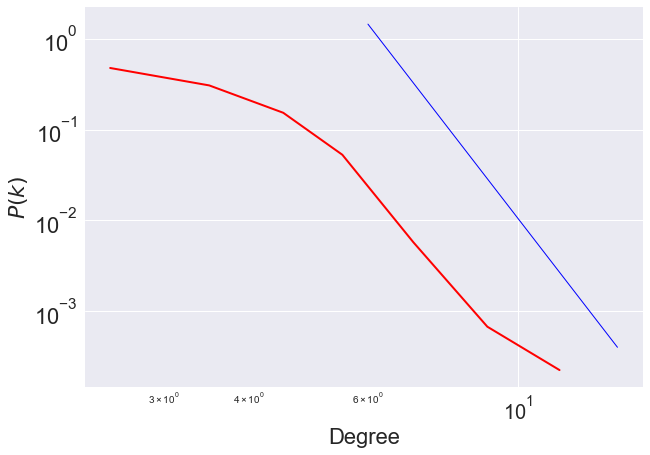

In [19]:
fig=plt.figure(figsize=(10,7))

#fig=pwl.plot_pdf(degree, color='r', linewidth=2)

fig=pwl.plot_pdf([x for x in degree if x>1], color='r', linewidth=2)

fit_function.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

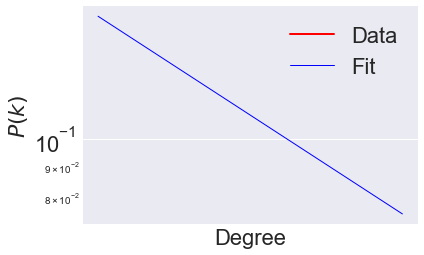

In [20]:
#### fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [21]:
fit_function.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

In [22]:
R,p = fit_function.distribution_compare('power_law', 'exponential', normalized_ratio=True)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [23]:
R,p

(3.8382013634028445, 0.0001239388290556167)

In [24]:
R2,p2 = fit_function.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [25]:
R2,p2

(3.5482804184474062, 0.00038775515953964776)

In [26]:
R3,p3 = fit_function.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions
/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [27]:
R3,p3

(0.0035885515164782926, 0.98847540321154503)

In [28]:
R4,p4 = fit_function.distribution_compare('power_law', 'stretched_exponential', normalized_ratio=True)

/usr/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [29]:
R4,p4

(2.0409642671624058, 0.041254378968059509)

In [30]:
R,p = fit_function_fixmin.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [31]:
R,p

(-3.9452667805216017, 7.9711181727220494e-05)

In [32]:
R3, p3 = fit_function_fixmin.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R3, p3

Assuming nested distributions


(-4.5129968568191412, 0.53884043870990195)

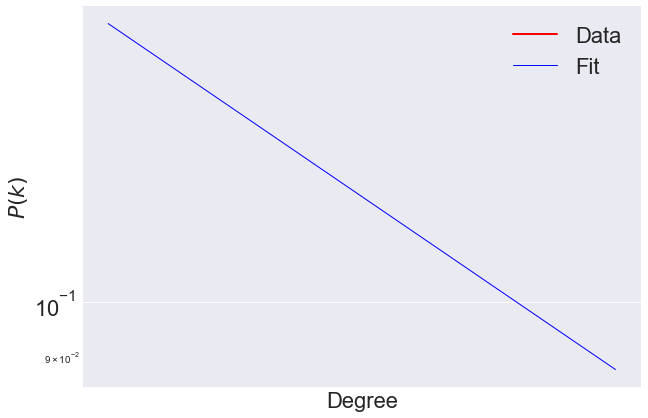

In [33]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.exponential.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

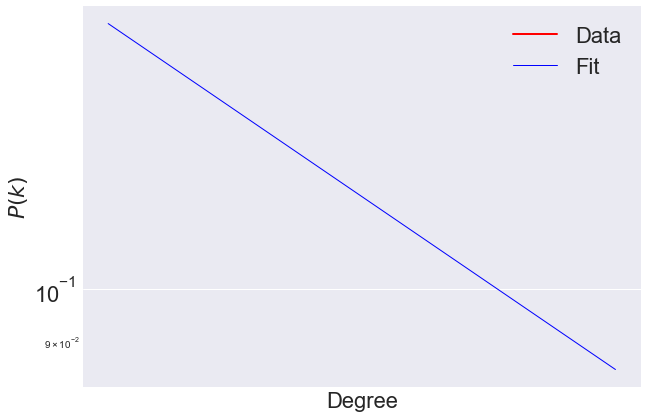

In [34]:
fig=plt.figure(figsize=(10,7))

fig=pwl.plot_pdf([x for x in degree if x>10], color='r', linewidth=2, label='Data')

fit_function_fixmin.truncated_power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='Fit')

fig.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('Degree', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [35]:
fit_function_fixmin.truncated_power_law.parameter1

1.0000005521486688

In [36]:
fit_function_fixmin.truncated_power_law.parameter2

0.26754389548008439